# Proyecto 2 
### Curso : Inteligencia Artificial
### Profesor : Cristian López Del Alamo

#### Nombres y Apellidos de Integrantes:

##### Integrante 1: Fabrizio Jesús Vásquez Auqui
##### Integrante 2: Ignacio Rubio

### Librerías

In [40]:
import os
import numpy as np
import pandas as pd
import pywt


import matplotlib.pyplot as plt
from abc import ABCMeta, abstractmethod
from skimage.io import imread, imshow

# Utilidades
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score, rand_score, adjusted_mutual_info_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics.cluster import homogeneity_score
from scipy.stats import multivariate_normal
import glob

# Librarías de modelos usados
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KDTree

import random
random.seed(10)


In [14]:
path = "./data/CK+48/"

In [15]:
def printCluster(target, prediction):
    cluster_element = {}
    for i, element in zip(target, list(prediction)):
        if i not in cluster_element:
            cluster_element[i] =[element]
        else:
            if element not in cluster_element[i]:
                cluster_element[i].append(element)
    print(cluster_element)

#### Base de datos de Emociones



##### Función para obtener los vectores característicos y PCA

In [62]:
content = os.listdir(path)

def feature_vector(picture, cortes):
  LL = picture
  for i in range(cortes):
    LL, (LH, HL, HH) = pywt.dwt2(LL, 'haar')
     #LL = LL/255
  #return LL.flatten()
  return LL.flatten()

def transform(img,n_components_=0.9999999):
  #scalar = MinMaxScaler()
  #img_scaled = scalar.fit_transform(img)
  pca_model = PCA(n_components=n_components_)
  pca_model.fit(img)
  transform_img = pca_model.transform(img)
  #projection = img_pca.inverse_transform(tranform_img)
  #plt.imshow(projection, cmap='gray')
  #print(transform_img.shape)
  return transform_img

def imagen_feature_vector(image_path):
  picture = imread(image_path)
  # len of feature vector = dim_1(picture)*dim_2(picture) / 4^cortes
  # len_feature_vector = dim_n(picure)/ 4^cortes
  # reduction_feature_vector = transform(picture)
  img = feature_vector(picture,2)
  coefficients_matrix = np.stack(img)
  data = coefficients_matrix.reshape(coefficients_matrix.shape[0], -1)

  print(data.shape)

  img_pca = transform(data)
  #converted_img = img_pca.fit_transform(img)
  return img_pca.flatten()

  
# 48 * 48
#len(imread('./data/CK+48/anger/S010_004_00000017.png'))
#transform(imread('./data/CK+48/anger/S010_004_00000017.png'))
#imagen_feature_vector('./data/CK+48/anger/S010_004_00000017.png')
len(imagen_feature_vector('./data/CK+48/anger/S010_004_00000017.png'))


(144, 1)


144

La imagen ha sido redimensionada mediante la Transformada Wavelet Discreta, en el cual el numero de dimensiones de nuestro vector caracterisrico dependera del numero de cortes

In [63]:
imagen_feature_vector('./data/CK+48/anger/S010_004_00000017.png')

(144, 1)


array([-2.77411458e+02, -2.64911458e+02, -2.96911458e+02, -2.79411458e+02,
        1.08854167e+00,  2.32338542e+02,  3.06338542e+02,  1.76338542e+02,
       -9.84114583e+01, -3.03661458e+02, -3.10911458e+02, -2.34114583e+01,
       -2.79661458e+02, -2.70411458e+02, -3.08411458e+02, -1.51614583e+01,
        2.21838542e+02,  2.82088542e+02,  3.18588542e+02,  3.03838542e+02,
        1.34088542e+02, -1.61661458e+02, -2.97911458e+02, -2.91411458e+02,
       -2.76161458e+02, -2.85161458e+02, -2.14661458e+02,  1.37338542e+02,
        2.41338542e+02,  2.08838542e+02,  2.80838542e+02,  2.50088542e+02,
        1.97588542e+02, -3.89114583e+01, -2.78661458e+02, -3.28411458e+02,
       -2.76661458e+02, -2.70161458e+02, -1.26411458e+02, -2.51614583e+01,
       -4.26614583e+01,  5.33854167e+00, -5.41614583e+01, -8.41614583e+01,
        9.18385417e+01,  4.33854167e+00, -2.26161458e+02, -3.23911458e+02,
       -1.58411458e+02, -2.80661458e+02, -1.55161458e+02, -2.07911458e+02,
       -2.77911458e+02,  

##### Función para cargar imágenes

In [64]:
# Cantidad de imagenes en cada carpeta
# anger:
# contempt: 
# disgust: 
# fear: 
# happy: 
# sadness:
# suprise: 

In [65]:
def feature_vector_load_images(folder):
  dicc = {}
  name_images = []
  feature_vector_val = []
  with os.scandir(path) as ficheros:
      for fichero in ficheros:
          if(fichero.name != ".DS_Store"):
            name_images.append(fichero.name)
            #dicc[fichero.name] = imagen_feature_vector(path+fichero.name)
            for name_image in os.scandir(fichero.path):
               #print(name_image.path,name_image.name)
               if(name_image.name not in dicc):
                dicc[name_image.path] = imagen_feature_vector(name_image.path)
                feature_vector_val.append(imagen_feature_vector(name_image.path))
                #print(imagen_feature_vector(name_image.path).shape)
                #dicc[name_image.path] = fichero.name

  return feature_vector_val

def complete(data):
  longitud_maxima = max(len(secuencia) for secuencia in data)
  # Realiza relleno (padding) para igualar la longitud de las secuencias
  datos_rellenados = []
  for secuencia in data:
      diferencia_longitud = longitud_maxima - len(secuencia)
      secuencia_rellenada = np.pad(secuencia, (0, diferencia_longitud), mode='constant')
      datos_rellenados.append(secuencia_rellenada)
  return np.array(datos_rellenados)

X = feature_vector_load_images(path) 
#complete_list_vectores_images = complete(list_vectores_images)
#images = np.concatenate(list_vectores_images) 
#type(images)
X[0].shape


(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(144, 1)
(

(144,)

In [66]:
X = np.array(X)
X.shape

(981, 144)

### Contar y guardar la cantidad de imagenes por tipo

#### Análisis exploratorio de los datos

In [67]:
# Guardando informacion de los tipos de imagenes en un dataframe para analizar
#count_images = 1
#dicc_images = {}
#for i,j in images.items():
#   dicc_images[count_images]= j
#   count_images += 1

#df_types = pd.DataFrame(dicc_images.items(), columns=['id', 'type'])
#df_types.to_csv('./data/data.csv', index=False, header=True, sep=',')

# Leer datos del csv exportado previamente
df_types = pd.read_csv('./data/data.csv')
target = np.array(df_types['type']).T
# Porcentaje de imagenes por tipo


#label_num = {"happy": 0, "contempt" : 1, "fear" : 2, "surprise" : 3, "sadness" : 4, "anger" : 5, "disgust" : 6}
label_num = {"anger": 0, "contempt" : 1, "disgust" : 2, "fear" : 3, "happy" : 4, "sadness" : 5, "surprise" : 6}
y = list(df_types.iloc[:, 1])
labels_true = [label_num[e] for e in y]

(100 * df_types['type'].value_counts() / len(df_types['type'])).round(2)


surprise    25.38
happy       21.10
disgust     18.04
anger       13.76
sadness      8.56
fear         7.65
contempt     5.50
Name: type, dtype: float64

Text(0, 0.5, 'Cantidad de imagenes')

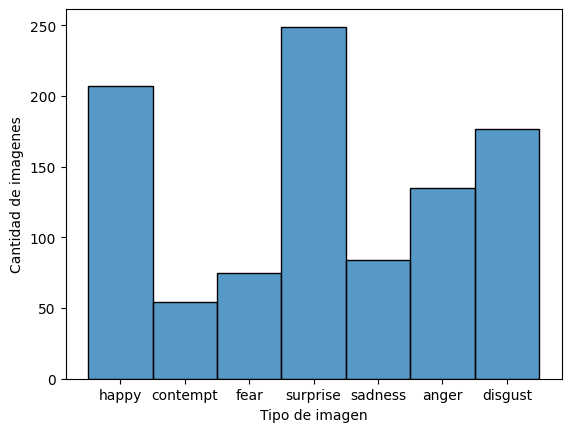

In [68]:
#df_types['type'].value_counts().plot(kind='bar',title='imagenes')
sns.histplot(data=df_types, x="type")
plt.xlabel('Tipo de imagen')
plt.ylabel('Cantidad de imagenes')

### Clase de Clustering

In [69]:
class Clustering(metaclass=ABCMeta):
    pass

#### Kmeans

In [70]:
class KMeansClustering(Clustering):
    def __init__(self,data, n_clusters=7,n_iter = 1000):
        self.data = data
        self.n_clusters = n_clusters
        self.n_iter = n_iter
        print("KMeansClustering: ",self.n_clusters)
        
    def init_centroide(self,data):
        centroides = data[np.random.choice(data.shape[0], self.n_clusters, replace=False),:]
        return centroides   
    
    def get_min_distance(self,data,centroide):
        index = []
        for row in data:
            index.append(np.argmin(euclidean_distances(centroide,[row])))
        return index
    
    def get_means(self,data,grupos,n):
        centroides = []
        for i in range(n):
            array = [data[j] for j, k in enumerate(grupos) if i == k]
            centroides.append(np.sum(array, axis = 0) / len(array))
        return centroides
    
    def kmean(self,):
        centroides = self.init_centroide(self.data) # Selecciona k centroides
        grupos = None
        for i in range(self.n_iter):
            grupos = self.get_min_distance(self.data, centroides)
            temp =  self.get_means(self.data, grupos, self.n_clusters)
            diff = np.array(centroides) - np.array(temp)
            centroides = temp
        return centroides, grupos



In [71]:
def get_score(labels_true, prediction_pca, X_pca):
    scores = {
        "PCA": np.array([silhouette_score(X_pca, prediction_pca),
        homogeneity_score(labels_true, prediction_pca), 
        rand_score(labels_true, prediction_pca),
        adjusted_rand_score(labels_true, prediction_pca), 
        adjusted_mutual_info_score(labels_true, prediction_pca)]), 
    }
    df = pd.DataFrame.from_dict(scores, orient = "index", columns=["Silhouette","Homogeneidad", "Rand", "Adjust Rand", "Adjust Mutual Information"])
    return df

In [72]:
kmeans_pca = KMeans(n_clusters=3, random_state= 42)
kmeans_pca.fit(X)
kmeans_model = KMeansClustering(X, n_clusters=3,n_iter = 1000)
centroides_pca, labels_impl = kmeans_model.kmean()
prediction_kmeans = kmeans_pca.predict(X)
print("PCA Kmeans sklearn")
printCluster(target, prediction_kmeans)
print("PCA Kmeans Implementado")
printCluster(target, labels_impl)


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeansClustering:  3
PCA Kmeans sklearn
{'happy': [0, 2, 1], 'contempt': [0, 1, 2], 'fear': [2, 1, 0], 'surprise': [0, 2, 1], 'sadness': [0, 1, 2], 'anger': [2, 1, 0], 'disgust': [2, 1, 0]}
PCA Kmeans Implementado
{'happy': [1, 2, 0], 'contempt': [1, 0, 2], 'fear': [2, 0, 1], 'surprise': [1, 2, 0], 'sadness': [1, 0, 2], 'anger': [2, 0, 1], 'disgust': [2, 0, 1]}


In [73]:
df = get_score(labels_true, labels_impl,X)
df

,Silhouette,Homogeneidad,Rand,Adjust Rand,Adjust Mutual Information
PCA,0.238528,0.031286,0.604627,0.029578,0.035415


In [74]:
df = get_score(labels_true, prediction_kmeans,X)
df

,Silhouette,Homogeneidad,Rand,Adjust Rand,Adjust Mutual Information
PCA,0.238528,0.031286,0.604627,0.029578,0.035415


#### DBSCAN

In [75]:

class DBSCANClustering(Clustering):
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

    def _neighborhood(self, point_id):
        dists = np.sqrt(((self.X - self.X[point_id]) ** 2).sum(axis=1))
        return np.where(dists <= self.eps)[0]

    def fit(self, X):
        self.X = X
        self.labels_ = -np.ones(X.shape[0], dtype=int)
        current_label = 0

        for point_id in range(X.shape[0]):
            if self.labels_[point_id] != -1:
                continue

            neighbors = self._neighborhood(point_id)
            if neighbors.size < self.min_samples:
                self.labels_[point_id] = 0
            else:
                current_label += 1
                self.labels_[point_id] = current_label
                self._expand_cluster(current_label, neighbors)

        return self

    def _expand_cluster(self, current_label, neighbors):
        i = 0
        while i < neighbors.size:
            next_point_id = neighbors[i]

            if self.labels_[next_point_id] == 0:
                self.labels_[next_point_id] = current_label
            elif self.labels_[next_point_id] == -1:
                self.labels_[next_point_id] = current_label
                next_neighbors = self._neighborhood(next_point_id)
                if next_neighbors.size >= self.min_samples:
                    neighbors = np.concatenate((neighbors, next_neighbors))

            i += 1

In [76]:
dbscan_pca = DBSCAN(eps= 100, min_samples= 3)
dbscan_model_pca = DBSCANClustering(eps= 100, min_samples= 3)
dbscan_pca.fit(X)
dbscan_model_pca.fit(X)
predict_dbscan_pca = dbscan_pca.labels_
predict_dbscan_model_pca = dbscan_model_pca.labels_

In [77]:
df = get_score(labels_true, predict_dbscan_pca,X)
df

,Silhouette,Homogeneidad,Rand,Adjust Rand,Adjust Mutual Information
PCA,-0.448739,0.030367,0.213967,0.003773,0.029527


In [78]:
df = get_score(labels_true, predict_dbscan_model_pca,X)
df

,Silhouette,Homogeneidad,Rand,Adjust Rand,Adjust Mutual Information
PCA,-0.448739,0.030367,0.213967,0.003773,0.029527


#### GMM

In [79]:
class GMMClustering(Clustering):
    def __init__(self, n_components=8):
        self.n_components = n_components
        print("GMMClustering: ",self.n_components)
    
    def parameters(self, X, n_gaussians):
        n, features = X.shape
        kmeans = KMeans(n_clusters=n_gaussians).fit(X)
        means = kmeans.cluster_centers_
        labels = kmeans.labels_
        mixing_coefficients = np.zeros(n_gaussians)
        covariance = np.zeros((n_gaussians, features, features))
        for i in range(n_gaussians):
            X_i = X[labels == i]
            mixing_coefficients[i] = len(X_i) / n
            covariance[i] = np.cov(X_i.T) + np.eye(features) * 1e-6 
        return mixing_coefficients, means, covariance

    def E(self,X,mixing_coefficients,means,covarianzas):
        n_samples = X.shape[0]
        n_gaussians = len(mixing_coefficients)
        log_responsabilidades = np.zeros((n_samples, n_gaussians))
        for j in range(n_gaussians):
            log_responsabilidades[:, j] = np.log(mixing_coefficients[j]) + multivariate_normal.logpdf(X, mean=means[j], cov=covarianzas[j])
        log_responsabilidades -= log_responsabilidades.max(axis=1, keepdims=True)
        responsabilidades = np.exp(log_responsabilidades)
        responsabilidades /= responsabilidades.sum(axis=1, keepdims=True)
        return responsabilidades
    
    def M(self, X, responsability):
            n_samples, features = X.shape
            n_components = responsability.shape[1]
            pi = responsability.sum(axis=0) / n_samples
            means = np.dot(responsability.T, X) / responsability.sum(axis=0)[:, np.newaxis]
            covarianzas = np.zeros((n_components, features, features))
            for j in range(n_components):
                diff = X - means[j]
                covarianzas[j] = np.dot(responsability[:, j] * diff.T, diff) / responsability[:, j].sum()
                covarianzas[j] += np.eye(features) * 1e-6
            return pi, means, covarianzas
    
    def train_GMM(self,X,n_gaussians,iterations=10):
        coeff,means,covarianzas = self.parameters(X,3)
        for i in range(n_gaussians):
            value = self.E(X,coeff,means,covarianzas)
            coeff,means,covarianzas = self.M(X,value)
        return coeff,means,covarianzas

    def fit(self, X):
        self.coeff, self.means, self.covarianzas = self.train_GMM(X, self.n_components)

    def predict(self, X):
        probabilities = np.zeros((X.shape[0], self.n_components))
        for i in range(self.n_components):
            probabilities[:, i] = multivariate_normal.pdf(X, mean=self.means[i], cov=self.covarianzas[i])

        return np.argmax(probabilities, axis=1)
 
    

In [80]:
gm_pca = GaussianMixture(n_components=7)
gm_pca.fit(X)
prediction_gm_pca = gm_pca.predict(X)
printCluster(target, prediction_gm_pca)

{'happy': [3, 6, 5, 2, 4, 1, 0], 'contempt': [3, 2, 4, 5, 6, 0, 1], 'fear': [2, 4, 3, 6, 1, 5], 'surprise': [3, 1, 2, 6, 4, 5, 0], 'sadness': [3, 2, 4, 6, 5, 0, 1], 'anger': [6, 4, 3, 2, 5, 0], 'disgust': [2, 6, 5, 4, 1, 3, 0]}


In [81]:
df_scores_pca = get_score(labels_true, prediction_gm_pca, X)
df_scores_pca

,Silhouette,Homogeneidad,Rand,Adjust Rand,Adjust Mutual Information
PCA,0.160845,0.095515,0.708712,0.062616,0.088333


In [82]:
gm_pca_model = GMMClustering(n_components=7)
gm_pca_model.fit(X)
prediction_gm_pca_model = gm_pca_model.predict(X)
printCluster(target, prediction_gm_pca_model)

GMMClustering:  7


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


LinAlgError: When `allow_singular is False`, the input matrix must be symmetric positive definite.

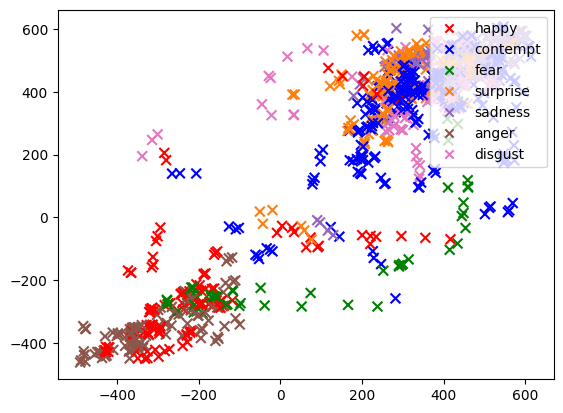

In [83]:
probs = gm_pca.predict_proba(X).round(3)
labels = gm_pca.fit(X).predict(X)
colors = ListedColormap(['r','b','g','tab:orange','tab:purple','tab:brown','tab:pink'])
size = 50 * probs.max(1) ** 2  # square emphasizes differences
types = ["happy","contempt","fear","surprise","sadness","anger","disgust"]
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, s=size,marker="x",cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=types,loc='upper right')


In [86]:
kmeans = KMeansClustering(X,n_clusters=8)
dbscan = DBSCANClustering(eps=0.5, min_samples=5)
gmm = GMMClustering(n_components=8)


KMeansClustering:  8
GMMClustering:  8


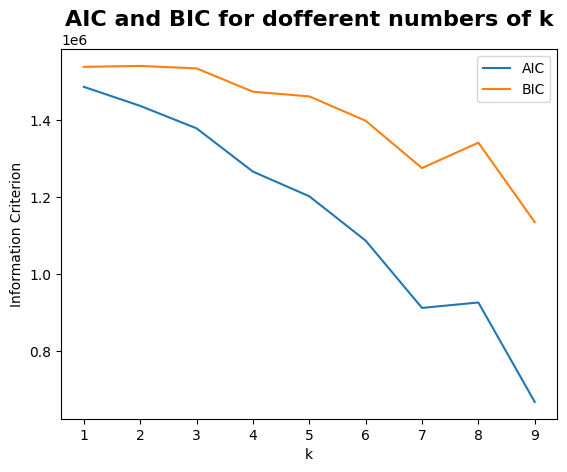

In [87]:
Sum_bic = []
Sum_aic = []

K = range(1,10)
for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm = gmm.fit(X)
    Sum_bic.append(gmm.bic(X))
    Sum_aic.append(gmm.aic(X))
    x1 = K
y1 = Sum_aic
plt.plot(x1, y1, label = "AIC")
x2 = K
y2 = Sum_bic
plt.plot(x2, y2, label = "BIC")

plt.title("AIC and BIC for dofferent numbers of k", fontsize=16, fontweight='bold')
plt.xlabel("k")
plt.ylabel("Information Criterion")
plt.legend(loc='upper right')
plt.show()